In [10]:
# 程式碼1 邏輯迴歸

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# 輸入資料
data = {
    '月份': ['110/1', '110/2', '110/3', '110/4', '110/5', '110/6', '110/7', '110/8', '110/9', '110/10', '110/11', '110/12',
            '111/1', '111/2', '111/3', '111/4', '111/5', '111/6', '111/7', '111/8', '111/9', '111/10', '111/11', '111/12'],
    '使用量': [2291365, 2208191, 2799636, 2717801, 1956980, 1147429, 1578183, 2070079, 2474077, 2643406, 2833737, 2816235,
            2474360, 1753064, 3185486, 2885346, 2103810, 2602521, 3307709, 3522522, 3177220, 2829746, 3473784, 2813139]
}

# 轉換為資料框
df = pd.DataFrame(data)

# 將使用量轉換為二元分類（超過平均使用量的為1，否則為0）
average_usage = df['使用量'].mean()
df['使用量_binary'] = (df['使用量'] > average_usage).astype(int)

# 使用 One-Hot 編碼將月份轉換為數值型特徵
X = pd.get_dummies(df[['月份']], drop_first=True).values
y = df['使用量_binary'].values

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建 Logistic 迴歸模型
model = LogisticRegression()

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 計算評估指標
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.4
Recall: 1.0
Precision: 0.4
F1 Score: 0.5714285714285714


In [4]:
#程式碼2 支持向量機

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 輸入資料
data = {
    '月份': ['110/1', '110/2', '110/3', '110/4', '110/5', '110/6', '110/7', '110/8', '110/9', '110/10', '110/11', '110/12',
            '111/1', '111/2', '111/3', '111/4', '111/5', '111/6', '111/7', '111/8', '111/9', '111/10', '111/11', '111/12'],
    '使用量': [2291365, 2208191, 2799636, 2717801, 1956980, 1147429, 1578183, 2070079, 2474077, 2643406, 2833737, 2816235,
            2474360, 1753064, 3185486, 2885346, 2103810, 2602521, 3307709, 3522522, 3177220, 2829746, 3473784, 2813139]
}

# 轉換為資料框
df = pd.DataFrame(data)

# 將日期轉換為數值
df['月份'] = df['月份'].apply(lambda x: int(x.split('/')[1]))

# 將使用量分成兩個類別
median_usage = df['使用量'].median()
df['使用量類別'] = (df['使用量'] > median_usage).astype(int)

# 分離特徵和目標
X = df[['月份']].values
y = df['使用量類別'].values

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 創建支持向量機模型
model = SVC()

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 計算準確度
accuracy = accuracy_score(y_test, y_pred)

# 計算精確率
precision = precision_score(y_test, y_pred)

# 計算召回率
recall = recall_score(y_test, y_pred)

# 計算 F1 分數
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6
Precision: 0.5
Recall: 0.5
F1 Score: 0.5


In [8]:
# 程式碼3 隨機森林 
import pandas as pd

# 輸入資料
data = {
    '月份': ['110/1', '110/2', '110/3', '110/4', '110/5', '110/6', '110/7', '110/8', '110/9', '110/10', '110/11', '110/12',
            '111/1', '111/2', '111/3', '111/4', '111/5', '111/6', '111/7', '111/8', '111/9', '111/10', '111/11', '111/12'],
    '使用量': [2291365, 2208191, 2799636, 2717801, 1956980, 1147429, 1578183, 2070079, 2474077, 2643406, 2833737, 2816235,
            2474360, 1753064, 3185486, 2885346, 2103810, 2602521, 3307709, 3522522, 3177220, 2829746, 3473784, 2813139]
}

# 轉換為資料框
df = pd.DataFrame(data)

# 將月份轉換為數字
df['月份'] = df['月份'].apply(lambda x: int(x.split('/')[0]) * 12 + int(x.split('/')[1]))

# 分離特徵和目標
X = df[['月份']].values
y = df['使用量'].values

print(X)
print(y)
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split

# 計算使用量的平均值
usage_mean = np.mean(y)

# 將目標變數轉換為二元分類
y_binary = (y > usage_mean).astype(int)

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# 創建決策樹模型
clf = DecisionTreeClassifier(random_state=42)

# 訓練模型
clf.fit(X_train, y_train)

# 在測試集上進行預測
y_pred = clf.predict(X_test)

# 計算準確度
accuracy = accuracy_score(y_test, y_pred)

# 計算召回率
recall = recall_score(y_test, y_pred)

# 計算精確率
precision = precision_score(y_test, y_pred)

# 計算 F1 分數
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

[[1321]
 [1322]
 [1323]
 [1324]
 [1325]
 [1326]
 [1327]
 [1328]
 [1329]
 [1330]
 [1331]
 [1332]
 [1333]
 [1334]
 [1335]
 [1336]
 [1337]
 [1338]
 [1339]
 [1340]
 [1341]
 [1342]
 [1343]
 [1344]]
[2291365 2208191 2799636 2717801 1956980 1147429 1578183 2070079 2474077
 2643406 2833737 2816235 2474360 1753064 3185486 2885346 2103810 2602521
 3307709 3522522 3177220 2829746 3473784 2813139]
Accuracy: 0.8
Recall: 1.0
Precision: 0.6666666666666666
F1 Score: 0.8


c:\Users\s0821\anaconda3\envs\dm20240413\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from current font.
  fig.canvas.draw()
c:\Users\s0821\anaconda3\envs\dm20240413\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from current font.
  fig.canvas.draw()
c:\Users\s0821\anaconda3\envs\dm20240413\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from current font.
  fig.canvas.draw()
c:\Users\s0821\anaconda3\envs\dm20240413\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from current font.
  fig.canvas.draw()
c:\Users\s0821\anaconda3\envs\dm20240413\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from current font.
  fig.canvas.draw()
c:\Users\s0821\anaconda3\envs\dm20240413\lib\site-packages\IPython\core\pyl

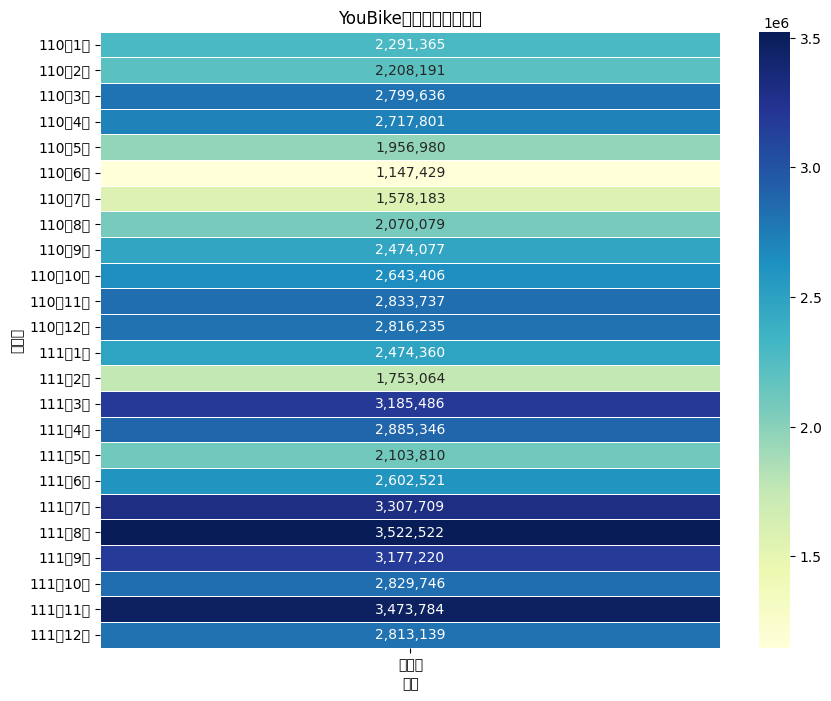

In [11]:
#熱力圖

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 準備數據
data = {
    '年月': ['110年1月', '110年2月', '110年3月', '110年4月', '110年5月', '110年6月', '110年7月', '110年8月', '110年9月', '110年10月', '110年11月', '110年12月', '111年1月', '111年2月', '111年3月', '111年4月', '111年5月', '111年6月', '111年7月', '111年8月', '111年9月', '111年10月', '111年11月', '111年12月'],
    '使用量': [ 2291365, 2208191, 2799636, 2717801, 1956980, 1147429, 1578183, 2070079, 2474077, 2643406, 2833737, 2816235, 2474360, 1753064, 3185486, 2885346, 2103810, 2602521, 3307709, 3522522, 3177220, 2829746, 3473784, 2813139]
}

# 轉換成 DataFrame
df = pd.DataFrame(data)

# 繪製熱力圖
plt.figure(figsize=(10, 8))
sns.heatmap(df.set_index('年月'), annot=True, cmap='YlGnBu', fmt=',.0f', linewidths=.5)
plt.title('YouBike每月使用量熱力圖')
plt.xlabel('年月')
plt.ylabel('使用量')
plt.show()


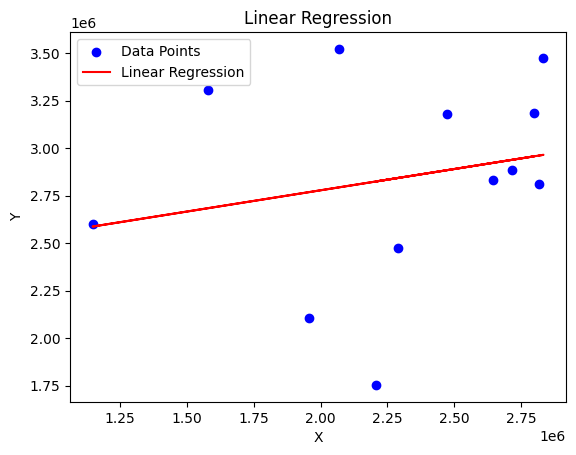

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 輸入資料
X = np.array([2291365, 2208191, 2799636, 2717801, 1956980, 1147429, 1578183, 2070079, 2474077, 2643406, 2833737, 2816235]).reshape(-1, 1)
Y = np.array([2474360, 1753064, 3185486, 2885346, 2103810, 2602521, 3307709, 3522522, 3177220, 2829746, 3473784, 2813139])

# 創建線性回歸模型
model = LinearRegression()

# 擬合模型
model.fit(X, Y)

# 獲得預測值
Y_pred = model.predict(X)

# 繪製散點圖和線性回歸線
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression')
plt.legend()
plt.show()
